# Energy Consumption Optimization

## Introduction

Utility companies need to accurately predict energy usage in order to manage loads efficiently, prevent power outages, and reduce energy loss. The main objective of this report is to predict the energy usage pattern by considering various factors, which include temperature, climatic conditions, and variations in the season. Additionally, this report aims to optimize energy, thereby reducing peak loads and distributing energy consumption more evenly. To explore this task, we will use machine learning algorithms to predict peak usage periods and optimization techniques, such as genetic algorithms, to enhance energy distribution for lower costs and better efficiency.

## Methods

In the subsequent steps, decision trees, random forests, and genetic algorithms are used to explore this task. Decision trees and random forests, along with genetic algorithms, are used for accurate predictions and optimization, thereby managing energy loads effectively. This process, in turn, helps utility companies perform more effectively. Decision trees are effective at identifying complex interactions between features and the target variable in energy consumption data, even when these relationships are not linear. Random forests, on the other hand, reduce overfitting by combining outhput of multiple trees. In other words, random forests enhance the predictive accuracy and robustness of the model. The genetic algorithm is used to optimize energy distribution after predicting energy usage patterns. Unlike other traditional methods that may remain in local optima, the algorithm performs a global search, assessing a wider solution range to find the best possible distribution of energy loads. It determines the most suitable way to maintain energy load distributions to adapt to varying energy demand patterns.

## Import the Libraries

In [1]:
# Get all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random 
import warnings
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Energy Consumption Prediction and Optimization Workflow

The workflow shows steps to make energy consumption more effective by predicting the peak usage period and regulating the supply and prices accordingly. Thus, we will use the recent data on energy usage, analyse the data to find the usage patterns, tidy it up, and then use strategies to predict the energy usage peaks. By predicting when these peaks will occur, we can improve the distribution of energy, thereby saving both time and resources.

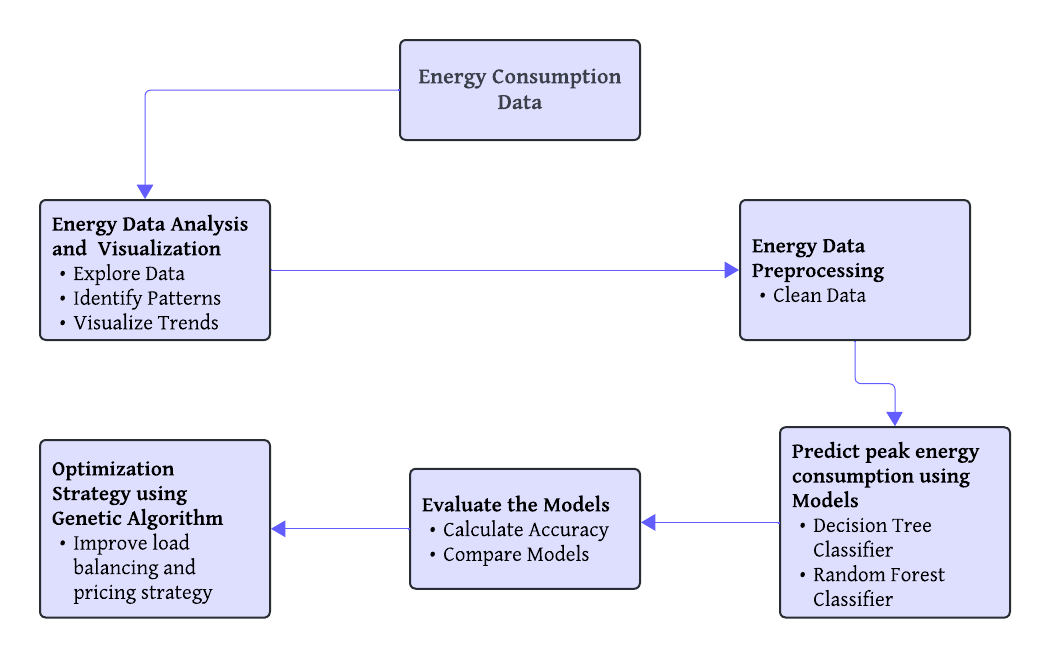

In [2]:
Image(filename='Energy_Flowchart_2321248.png')

## Load the Dataset

This dataset comprises a wide range of features: timestamp, temperature, humidity, square footage, occupancy, HVAC usage, lighting usage, renewable energy, day of the week, holiday, and energy consumption. Moreover, it provides an extensive study to analyze the factors that influence energy consumption, enabling insightful and exploratory data interpretation and predictive analytics.

- __Timestamp__: Date and Time at which the data was recorded.
- __Temperature__: Temperature measured in degree celsius at the time of recording.
- __Humidity__: Percentage of humidity level at the time of recording.
- __Square Footage__: Total area of the environment in square feet.
- __Occupancy__: Number of individuals present at the time of recording.
- __HVAC Usage__: Categorical variable denoting HVAC system's operational state.
- __Lighting Usage__: Categorical variable representing the lighting system's operational state .
- __Renewable Energy__: Percentage of energy produced from renewable sources.
- __Day of the Week__: Categorical variable representing the particular day on which the data was recorded.
- __Holiday__: Categorical variable denoting an indicator of whether the data was recorded on a holiday or nor.
- __Energy Consumption__: Amount of energy consumed by the environment.

The dataset used for this purpose is taken from Kaggle. 

Kaggle Dataset Link: https://www.kaggle.com/datasets/mrsimple07/energy-consumption-prediction

In [3]:
# Import the dataset
energy_data = pd.read_csv('Energy_consumption_data.csv')
# Display few records
energy_data.head(10)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
5,2022-01-01 05:00:00,29.576037,36.824263,1871.709180,6,Off,Off,17.626690,Sunday,Yes,84.321885
6,2022-01-01 06:00:00,25.131167,35.709622,1607.001228,6,On,Off,24.264702,Friday,Yes,76.165791
7,2022-01-01 07:00:00,23.182844,31.679920,1633.955330,8,Off,Off,27.517099,Thursday,Yes,74.131906
8,2022-01-01 08:00:00,25.391999,46.399364,1240.309224,6,On,Off,2.307595,Sunday,No,78.206236
9,2022-01-01 09:00:00,22.212549,32.418464,1705.420336,1,On,Off,29.140071,Tuesday,No,77.992214


## Exploratory Data Analysis

The given summary statistics provide an overview of the dataset's features, highlighting the mean and standard deviation. The below observation spans from January 1, 2022, to February 11, 2022.

The temperature data shows moderate temperature variation, with a mean temperature of about 24.98 °C and a standard deviation of roughly 2.84 °C.

The humidity data indicates some fluctuation in humidity levels, with a mean of 45.40% and a standard deviation of about 8.52%.

SquareFootage, with a mean of 1500.05 square feet. and a standard deviation of about 288.42 square feet, suggests a considerable variation in sizes.

Occupancy with a mean of 4.58 and a standard deviation of about 2.87 indicates a wide range of occupancy levels.

Renewable energy also suggests a significant range in the use of renewable energy sources.

Energy usage suggests a moderate variation, with a mean of approximately 77.06 units and a standard deviation of 8.14 units.

Overall, the moderate variations in temperature and humidity indicate that these factors can have an impact on energy consumption. Additionally, variations in occupancy and total area may also have an impact on energy usage.

In [4]:
# Convert timestamp to date and time format
energy_data['Timestamp'] = pd.to_datetime(energy_data['Timestamp'])

# Get the hour,day of the week,and month from the given timestamp
energy_data['Hour'] = energy_data['Timestamp'].dt.hour
energy_data['DayOfWeek'] = energy_data['Timestamp'].dt.dayofweek
energy_data['Month'] = energy_data['Timestamp'].dt.month

# Get the summary report
summary_report = energy_data.describe()
print("Summary of the energy consumption dataset:")
print("-------------------------------------------")
print(summary_report)

Summary of the energy consumption dataset:
-------------------------------------------
                           Timestamp  Temperature     Humidity  SquareFootage  \
count                           1000  1000.000000  1000.000000    1000.000000   
mean   2022-01-21 19:29:59.999999744    24.982026    45.395412    1500.052488   
min              2022-01-01 00:00:00    20.007565    30.015975    1000.512661   
25%              2022-01-11 09:45:00    22.645070    38.297722    1247.108548   
50%              2022-01-21 19:30:00    24.751637    45.972116    1507.967426   
75%              2022-02-01 05:15:00    27.418174    52.420066    1740.340165   
max              2022-02-11 15:00:00    29.998671    59.969085    1999.982252   
std                              NaN     2.836850     8.518905     288.418873   

         Occupancy  RenewableEnergy    DayOfWeek  EnergyConsumption  \
count  1000.000000      1000.000000  1000.000000        1000.000000   
mean      4.581000        15.132813     2

## Data Visualization

The x-axis represents the date, ranging from early January 2022 to early February 2022, and the y-axis represents the energy usage, which ranges from 60 to 100 units. The graph indicates significant variations in energy consumption over time. This suggests variations in energy consumption patterns, including both high and low usage periods. Several peaks are observed throughout the time period. These peaks might correspond to specific hours of the day that cause an increase in energy demand.

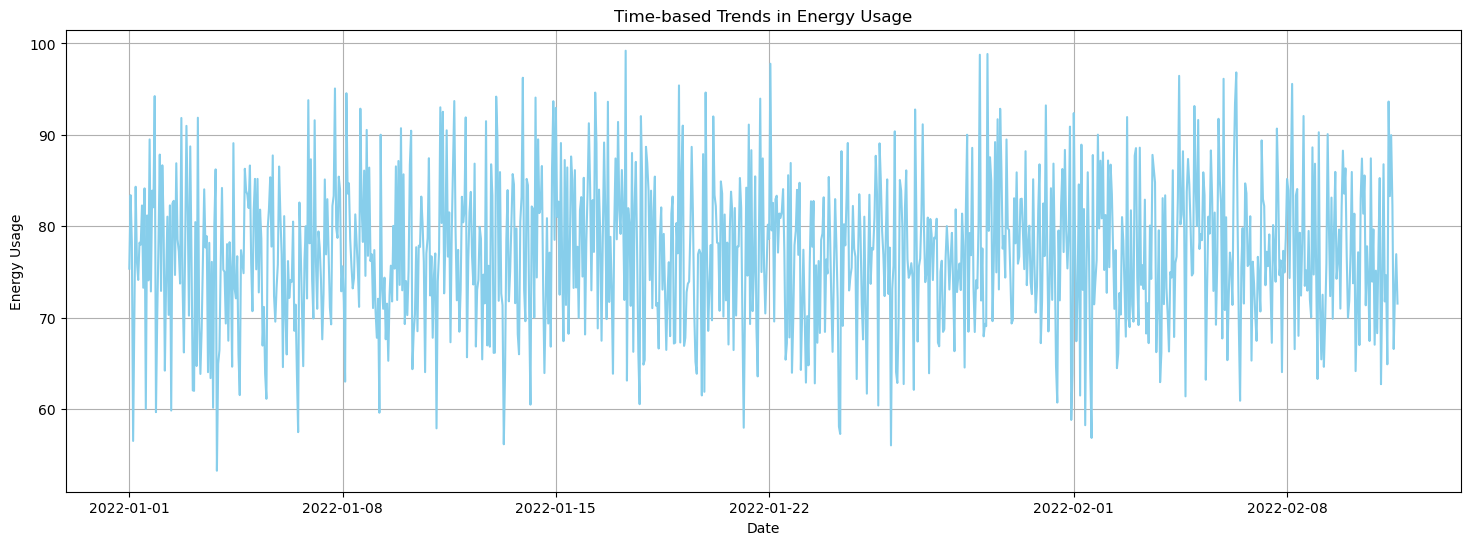

In [5]:
# Consumption of Energy over time period
plt.figure(figsize=(18, 6))
plt.plot(energy_data['Timestamp'], energy_data['EnergyConsumption'],color = 'skyblue')
plt.title('Time-based Trends in Energy Usage')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.grid(True)
plt.show()

The x-axis represents the date, ranging from early January 2022 to early February 2022, shows that the temperature data spans slightly over a month. The y-axis represents the temperature, which ranges from 20 °C to 30 °C. The graph shows significant variation in temperature over time, suggesting a high level of fluctuation within the observed period. Moreover, the several peaks and troughs suggest a high rate of temperature variations.

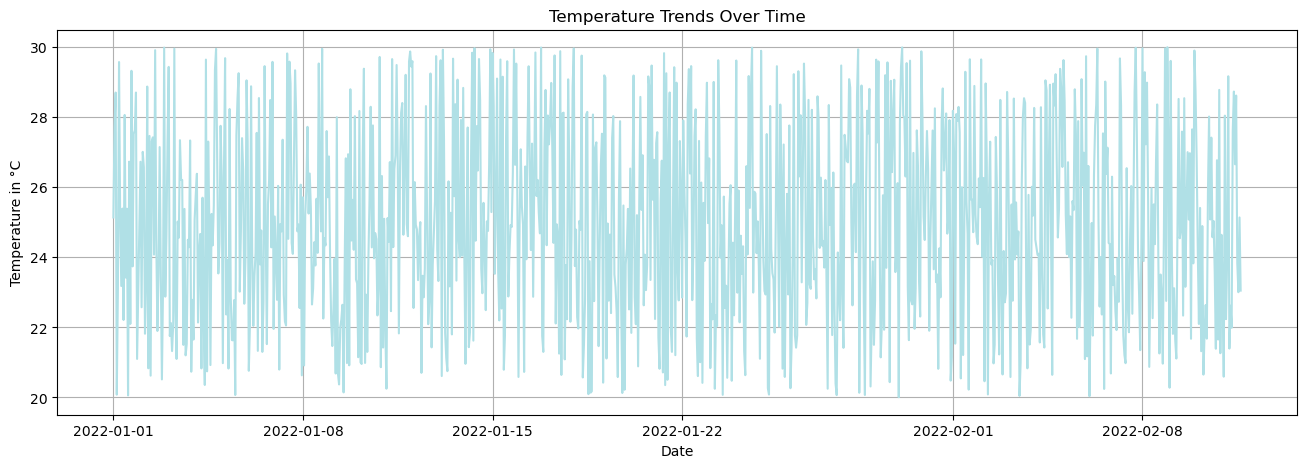

In [6]:
# Temperature Vs time period
plt.figure(figsize=(16, 5))
plt.plot(energy_data['Timestamp'], energy_data['Temperature'],color = 'powderblue')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature in °C')
plt.grid(True)
plt.show()

The x-axis indicates the date, showing that the humidity extends slightly over a month. The y-axis shows the humidity levels, which range from roughly 30% to 60%. The graph suggests significant variations in humidity over time, suggesting a high level of variation in the observed period. Also, there are several peaks and troughs in the humidity levels, showing frequent variations in humidity.

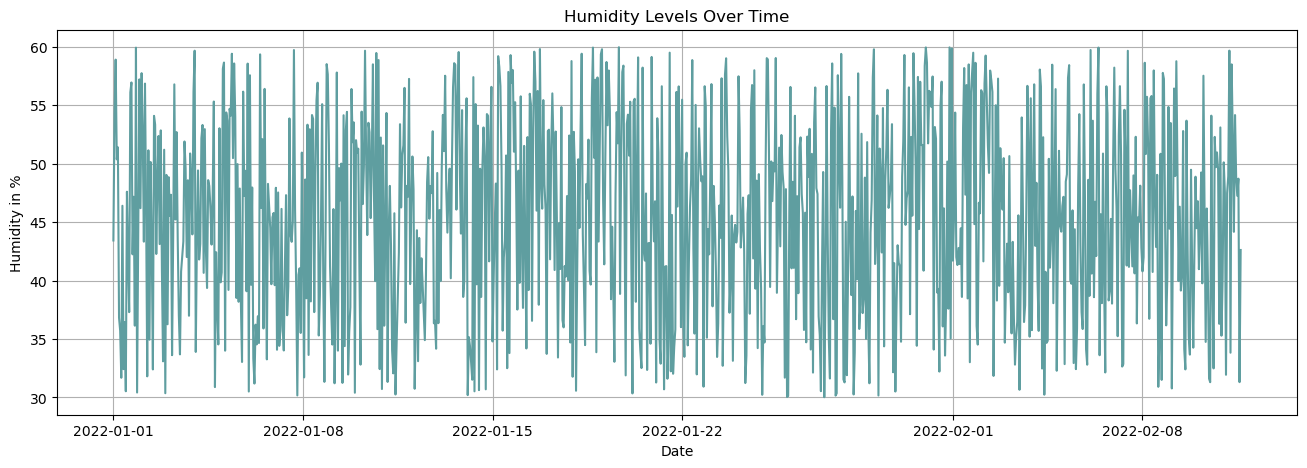

In [7]:
# Humidity Vs time period
plt.figure(figsize=(16, 5))
plt.plot(energy_data['Timestamp'], energy_data['Humidity'],color = 'cadetblue')
plt.title('Humidity Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity in %')
plt.grid(True)
plt.show()

The below graph suggests that energy consumption data seems to be distributed relatively normally, with an average of 77 units and a moderate distribution, i.e., a standard deviation of 8.14 units. The data ranges between 50 and 100 units, with most of the values concentrated around the mean and no significant outliers. Further analysis of this dataset can aid in more effective planning and energy management.

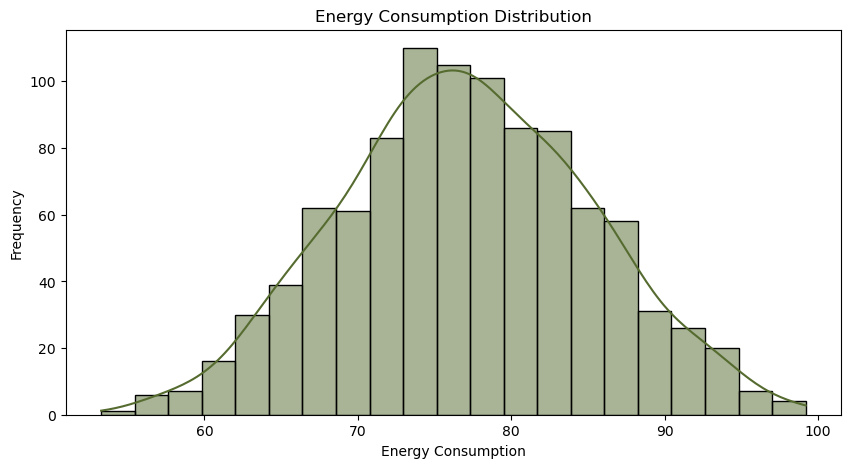

In [8]:
# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Distribution of energy consumption
plt.figure(figsize=(10, 5))
sb.histplot(energy_data['EnergyConsumption'], kde=True,color='darkolivegreen')
plt.title('Energy Consumption Distribution')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing

The energy data is processed by handling missing values and applying one-hot encoding to categorical variables. The code data.fillna(..) is used to fill missing (NaN) values in the dataset. Using the forward filling technique, the missing value is replaced by the last observed non-missing value. The code pd.get_dummies() is used to convert categorical data into a one-hot encoded format. This process is used to convert the categorical variables into a format suitable for machine learning algorithms. Each categorical value is converted into a new column, with binary values, i.e., 0 or 1, suggesting that the category exists in each row.

In [9]:
# Fill missing values with the previous value i.e.,forward filling
energy_data.fillna(method='ffill', inplace=True)

# Convert categorical variables into a format that algorithm can use to make better predictions
energy_data = pd.get_dummies(energy_data,
                             columns=['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday'], 
                             drop_first=True)

# Display few rows 
energy_data.head(6)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,Hour,Month,HVACUsage_On,LightingUsage_On,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Holiday_Yes
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,2.774699,75.364373,0,1,True,False,False,False,False,False,True,False,False
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,21.831384,83.401855,1,1,True,True,False,False,False,False,True,False,False
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,6.764672,78.270888,2,1,False,False,False,False,False,False,True,False,False
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,8.623447,56.519850,3,1,False,True,False,False,False,False,True,False,False
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,3.071969,70.811732,4,1,True,False,False,False,False,False,True,False,False
5,2022-01-01 05:00:00,29.576037,36.824263,1871.709180,6,17.626690,84.321885,5,1,False,False,False,False,False,False,True,False,True


In the subsequent steps, decision trees and random forest classifiers will be used to predict the peak energy consumption periods based on the energy consumption dataset. Models will be built and evaluated to predict whether energy consumption will exceed a specific threshold. Moreover, the accuracy and performance of these models will be assessed using metrics like accuracy scores and classification reports.

## Decision Tree

For the decision tree, the threshold for peak consumption is defined. This threshold is calculated by adding the mean of energy consumption along with the standard deviation. This threshold value is used to identify values that are significantly higher than the average. As shown in the below code, 'X' represents all other columns as features for the model, except 'Timestamp', 'EnergyConsumption', 'Peak'. 
'y' represents the target variable, i.e., the 'Peak' column. Thereafter, the data is split into training and testing sets. In this scenario, we are splitting the dataset into training and testing sets, with 70% of the data for training and 30% for testing purposes. Also, the same data split will be obtained each time the code is executed, using the random_state parameter. The decision tree classifier is trained, and the model's effectiveness is evaluated using accuracy and classification reports.

Based on the output, the accuracy of the decision tree model in predicting energy usage is around 0.773. This model effectively identified around 77.3% of accuracy in the test set. The model performs well in identifying instances of the majority class (false) with high precision and recall values. Additionally, lower precision and recall indicate that the model exhibits issues with the minority class (true). Hence, the model shows a significant performance gap between the majority and minority classes, despite having acceptable accuracy score.

In [10]:
# Decision Tree to Predict Peak Usage Periods
max_threshold = energy_data['EnergyConsumption'].mean() + energy_data['EnergyConsumption'].std()
energy_data['Peak'] = energy_data['EnergyConsumption'] > max_threshold

# Remove the unnecessary columns and keep the required features
X = energy_data.drop(columns=['Timestamp', 'EnergyConsumption', 'Peak'])

# Target variable for prediction
y = energy_data['Peak']

# Split 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_energy = DecisionTreeClassifier(random_state=42)
dt_energy.fit(X_train, y_train)
y_pred_dt = dt_energy.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_dt}")
print("Classification Report:")
print(report_dt)

Accuracy: 0.7733333333333333
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.87      0.86       248
        True       0.33      0.31      0.32        52

    accuracy                           0.77       300
   macro avg       0.60      0.59      0.59       300
weighted avg       0.77      0.77      0.77       300



## Decision Tree Visualization to Identify Peak Energy Usage Periods

As shown by the decision tree, the tree divides the data at each node based on the threshold values. The root node, for instance, classifies the data based on the temperature, whether it's below or equal to 27.56. The tree splits each leaf node into peak or non-peak. Each node holds information about the number of samples that reach that particular node. The non-peak class is highlighted in orange, while the peak class is highlighted in blue. As shown in the tree graph, temperature is a key factor in finding the peak usage periods. Peak periods correspond to higher temperatures, and non-peak periods are related to lower temperatures. Also, reduced renewable energy usage is related to non-peak periods. HVAC usage and occupancy play another vital role in the energy usage pattern. It is more likely to be a non-peak period when the HVAC is off. In addition to that, higher occupancy is associated with peak hours, as it increases consumption rates. Hence, the decision tree is quite complex, with multiple layers and nodes including several features and their relations.

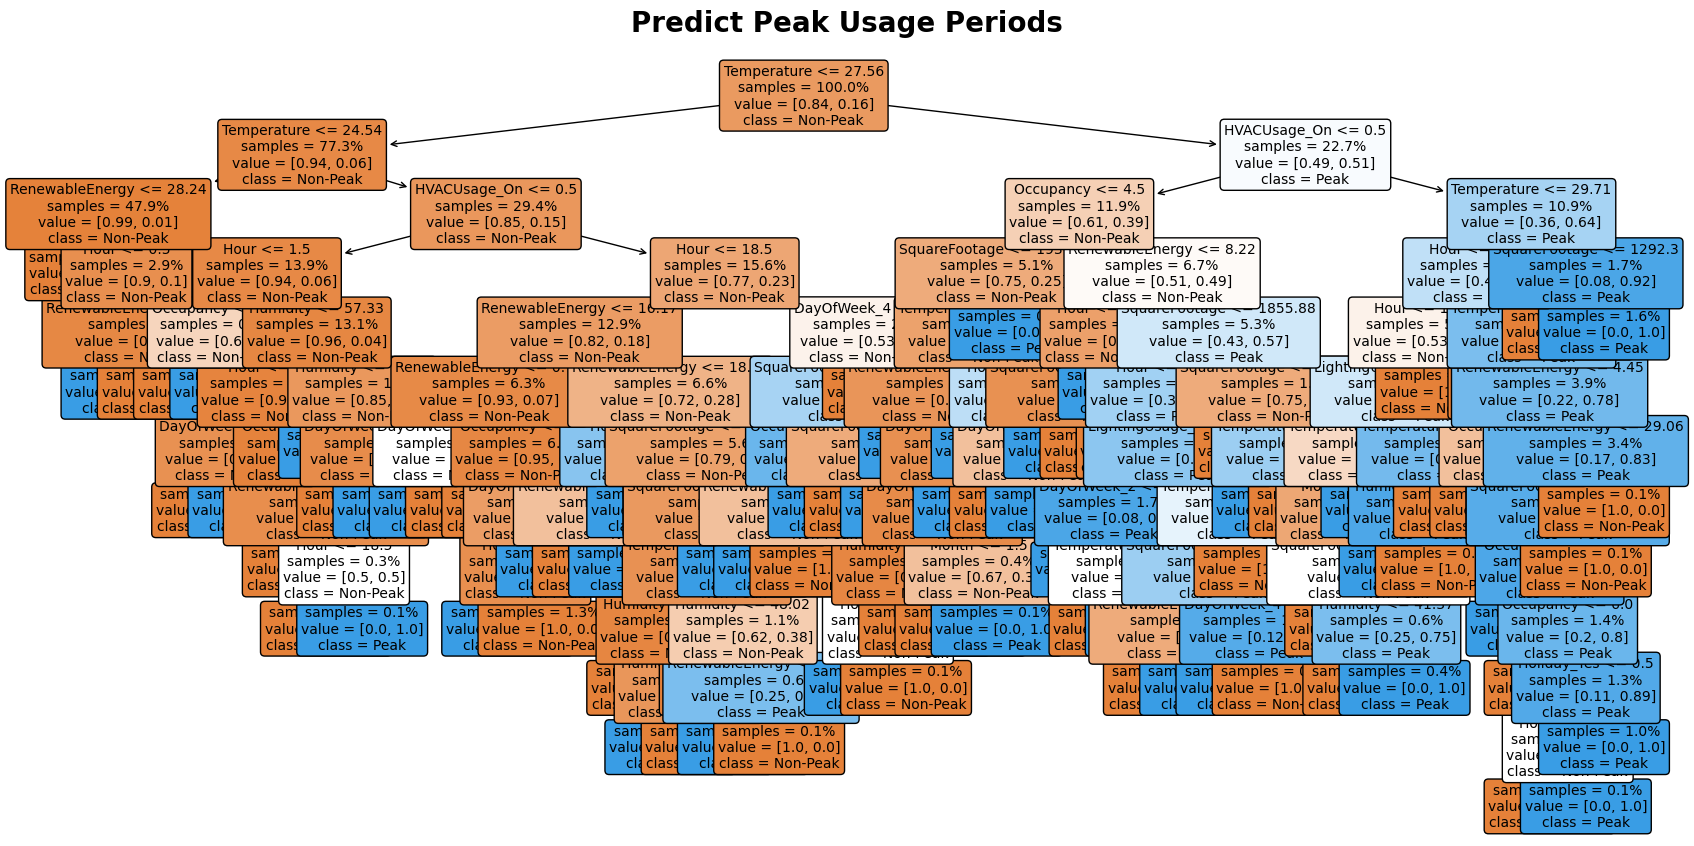

In [11]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(  dt_energy, # Trained Decision Tree Classifier
            filled=True, 
            feature_names=X.columns, 
            class_names=['Non-Peak', 'Peak'], 
            rounded=True, 
            proportion=True,  
            fontsize=10,     
            impurity=False,  
            precision=2 )

# Set the title with specific parameters
plt.title('Predict Peak Usage Periods', fontsize=20, pad = 25, fontweight='bold')
plt.show()

## Random Forest

The model is trained, predictions are obtained, and the accuracy and classification report are shown for the Random Forest classifier.

The output indicates that the Random Forest model estimates an accuracy of 0.843 in predicting energy consumption. In the test set, the model accurately identified around 84.3% of the instances. Additionally, it performs quite well in identifying the majority class (false) with higher precision and recall.

Overall, the Random Forest model performs better in terms of accuracy and handling of the majority class as compared to the Decision Tree model.

In [12]:
# Random Forest Classifier
rfc_energy = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_energy.fit(X_train, y_train)
y_pred_rfc = rfc_energy.predict(X_test) 
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
report_rfc = classification_report(y_test, y_pred_rfc)

print(f"Accuracy: {accuracy_rfc}")
print("Classification Report:")
print(report_rfc)

Accuracy: 0.8433333333333334
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.96      0.91       248
        True       0.61      0.27      0.37        52

    accuracy                           0.84       300
   macro avg       0.74      0.62      0.64       300
weighted avg       0.82      0.84      0.82       300



## Energy Consumption before Optimization

This graph indicates that the energy usage seems to be even throughout the given period, with a slight drop towards the end. Also, the energy usage remains relatively constant, with most values lying within the range of 1500 and 2000 units of energy usage.

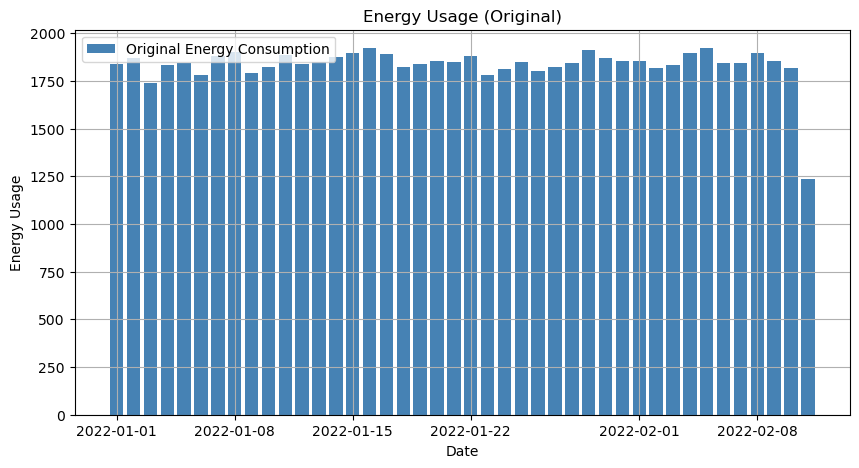

In [13]:
# Bar Plot of Actual Energy Consumption before Optimization
original_data = energy_data.resample('D', on='Timestamp').sum()

plt.figure(figsize=(10, 5))
plt.bar(original_data.index, 
        original_data['EnergyConsumption'],
        color='steelblue',
        label='Original Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.title('Energy Usage (Original)')
plt.legend()
plt.grid(True)
plt.show()

## Load Optimization using Genetic Algorithm

Genetic algorithm will be used to optimize the energy load distribution. The algorithm aims to minimize the difference between the optimized load and actual energy usage while keeping the same total load. This implementation of an evolutionary or genetic algorithm will effectively balance the energy load, reducing peak loads and potentially reducing energy costs. 

For this purpose, 'energy_load' is taken, which is an array representing the candidate in the genetic algorithm and holds the proposed energy consumption values for each time slot.

The fitness function determines the sum of squared differences between the 'energy_load' and the actual energy usage. This is the function that the genetic algorithm aims to reduce. 

The total_energy_constraint function calculates the difference between the total energy in the 'energy_load' and the total energy usage. It ensures that the total energy provided by energy_load matches the total energy usage, i.e., this should be zero.

The load_optimization_genetic function initialises 'candidate_solutions' for the genetic algorithm. This variable 'candidate_solutions' is an initial of random candidates, where each candidate is a load distribution vector of the same length as the energy usage. The genetic algorithm undergoes 'n' iterations, i.e., a specified number of generations. The fitness of each candidate is calculated using the fitness function. Further, the candidate solution indices are sorted in ascending order based on their fitness score. The 'candidate_solutions' are reordered based on fitness, so that the best solution appears at the beginning. Then, the top half of the 'candidate_solutions' is considered to form the new candidate solution. The best part of the solution is stored. 
Afterwards, a new child is created by combining parts of both parents randomly and performing crossover at a random point. Thereafter, the child is mutated with a certain probability by changing one of its genes to a random value. This process continues until the new candidate solution is filled to the original size. Then, the new candidate solution replaces the previous one. After the final generation, the best solution is assigned with the lowest fitness function score.

Finally, the required parameters are set to execute the main genetic algorithm. The optimized load is normalized in order to ensure that the total energy corresponds to the actual total energy consumption. This step is required to ensure that the optimized load values are properly adjusted and do not exceed the actual energy consumption at any given time.

In [14]:
# Load Optimization using Genetic Algorithm 

def fitness(energy_load):
    return np.sum((energy_load - energy_usage) ** 2)

def total_energy_constraint(energy_load):
    return np.sum(energy_load) - np.sum(energy_usage)

def load_optimization_genetic(energy_usage, size, n, mutation_prob):

# Initialize the candidate solution
    candidate_solutions = [np.random.rand(len(energy_usage)) * np.max(energy_usage) for _ in range(size)]
    
    for k in range(n):
# Get the fitness value for each candidate in the candidate solutions
        fitness_value = [fitness(candidate) for candidate in candidate_solutions]
    
# Sort by the fitness values in ascending order
        sorted_values = np.argsort(fitness_value)
        candidate_solutions = [candidate_solutions[i] for i in sorted_values]

# Store the new candidate solution with the top half of the candidate solution
        new_cand_solution = candidate_solutions[:size // 2]
        
# Generate new candidate solution using crossover and mutation
        while len(new_cand_solution) < size:
            parent_a, parent_b = random.sample(candidate_solutions[:size // 2], 2) 
            crossover = random.randint(1, len(energy_usage) - 1)
            child = np.concatenate((parent_a[:crossover], parent_b[crossover:]))
# Apply mutation            
            if random.random() < mutation_prob:
                mutation_idx = random.randint(0, len(energy_usage) - 1)
                child[mutation_idx] = np.random.rand() * np.max(energy_usage)
                
            new_cand_solution.append(child)

# Modify candidate_solutions for the next generation
        candidate_solutions = new_cand_solution
        
    best_solution = candidate_solutions[0]
    return best_solution


## Normalize the Optimized Load

# Set parameters to execute the algorithm
energy_usage = energy_data['EnergyConsumption'].values  # Actual energy consumption data from the dataset
size = 50 # No. of candidate solutions in each generation of the genetic algorithm
n = 100 # No. of iterations to run the genetic algorithm
mutation_prob = 0.1 # Probability of mutation occurring in each candidate solutions

# Call the load optimization function
optimized_load = load_optimization_genetic(energy_usage, size, n, mutation_prob)

# Get the total energy consumption by adding up energy_usage values
total_energy = np.sum(energy_usage)

# Adjust each value in the optimized_load so that the sum of the optimized load values 
# matches the total_energy values
optimized_load = optimized_load * (total_energy / np.sum(optimized_load))

# Make sure that the optimized load does not exceed actual load
optimized_load = np.minimum(optimized_load, energy_usage)

# Overall energy Consumption by both original and optimized
tot_energy_use_org = np.sum(energy_usage)
tot_energy_use_opt = np.sum(optimized_load)

# Average Energy Consumption by both original and optimized
avg_energy_org = np.mean(energy_usage)
avg_energy_opt = np.mean(optimized_load)

# Summary report
print("Impact of Optimization on Energy Usage")
print("---------------------------------------")
print(f"Total Energy Usage (Original): {tot_energy_use_org:.2f}")
print(f"Total Energy Usage (Optimized): {tot_energy_use_opt:.2f}")
print()
print(f"Average Energy Usage (Original): {avg_energy_org:.2f}")
print(f"Average Energy Usage (Optimized): {avg_energy_opt:.2f}")

Impact of Optimization on Energy Usage
---------------------------------------
Total Energy Usage (Original): 77055.87
Total Energy Usage (Optimized): 61490.87

Average Energy Usage (Original): 77.06
Average Energy Usage (Optimized): 61.49


## Visualize Original Vs Optimized Energy Consumption Load

The resulted graph compares actual energy usage with optimized load distribution over a specific time period. The X-axis indicates the date range, while the energy consumption units are shown on the Y-axis. It shows how the energy load is distributed using the optimization technique. As shown by the graph, the red bars seem to be lower than the blue bars at their peaks. This suggests that the optimization process is quite effective in reducing peak energy consumption. Additionally, during off-peak hours, the optimized red bars can appear to be higher than the blue ones, suggesting that the load has been shifted to a period when demand is lower.

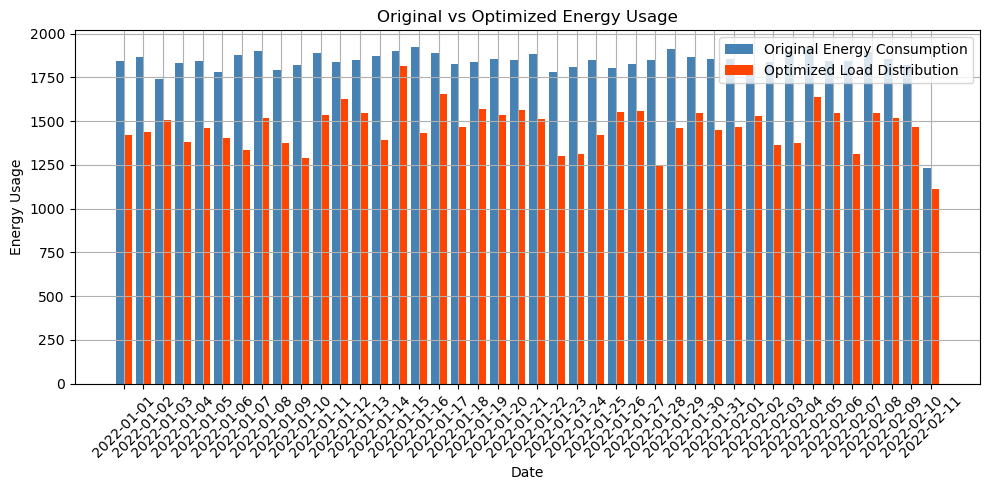

In [15]:
# Data resampling from an irregular time series into a regular daily time series
original_data = energy_data.resample('D', on='Timestamp').sum()
# Optimized load resampling to daily frequency and sum the values
optimized_load_data = pd.Series(optimized_load, index=energy_data['Timestamp']).resample('D').sum()

# Bar Plot for Actual and Optimized Energy Consumption
plt.figure(figsize=(10, 5))
bar_width = 0.4
index = np.arange(len(original_data))

plt.bar(index, 
        original_data['EnergyConsumption'], 
        bar_width, 
        color='steelblue', 
        label='Original Energy Consumption')
plt.bar(index + bar_width, 
        optimized_load_data.values, 
        bar_width, 
        color='orangered', 
        label='Optimized Load Distribution')

plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.title('Original vs Optimized Energy Usage')
plt.xticks(index + bar_width / 2, original_data.index.date, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

## Conclusion

Overall, the decision tree model shows better performance in predicting peak and non-peak energy demand, with an accuracy rate of 77.3%. Further, the random forest model performs more effectively than the decision tree, with an accuracy rate of 84.3%. This was achieved by applying the ensemble learning method of random forests, thereby reducing overfitting and finding more complex trends in the data. Also, the genetic algorithm effectively improves energy usage, resulting in a drop in average energy consumption from 77.06 units to 60.88 units. Thus, we can conclude that the results drawn from this task align with the problem statement and the subsequent analysis of the decision trees, which provide interpretable models that identify complex and non-linear relationships in energy consumption data. This helps in analysing the main factors affecting energy demand and usage patterns. In addition to that, random forests improve the accuracy and robustness of the model by combining multiple decision trees. Furthermore, genetic algorithms help in the optimisation of energy distribution. These strategies are quite suitable for accurate prediction, efficient load management, and cost-effective energy distribution, leading to various operational and financial benefits.